# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df=pd.read_csv(r"C:\Users\HRIDVI ARORA\Downloads\database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

The dataset contains 907 rows and 27 columns.

In [5]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can observe that there are many Nan values in dataset

In [6]:
df=df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

Dropping the columns having more null values.

In [7]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

# Replacing Nan values using mean method

In [8]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [9]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

# Replacing Nan values using mode method

In [10]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [11]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [12]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [13]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [14]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [15]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

Since it is a categorical column so we are replacing  Nan with mode value

In [16]:
df['year_of_capacity_data']=df['year_of_capacity_data'].replace('NaN','2019')

In [17]:
df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
commissioning_year      -1.714873
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

In [18]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())

In [19]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())

In [20]:
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())

In [21]:
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [22]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [23]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [24]:
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [25]:
df.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

# Removing Unneccesary columns

In [26]:
df=df.drop(columns=['country','country_long','name','gppd_idnr','owner','url','year_of_capacity_data','source'],axis=1)

In [27]:
df.isna().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

We have removed all Nans and unncessary columns

In [28]:
df.shape

(907, 13)

Our new dataset contains 907 rows and 13 columns.

In [29]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,98.0,24.7663,74.6090,Coal,Oil,2015.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,39.2,21.9038,69.3732,Wind,Oil,2015.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Oil,2015.0,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
904,25.5,15.2758,75.5811,Wind,Oil,2015.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
905,80.0,24.3500,73.7477,Coal,Oil,2015.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority


In [30]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             907 non-null    object 
 5   commissioning_year      907 non-null    float64
 6   geolocation_source      907 non-null    object 
 7   generation_gwh_2014     907 non-null    float64
 8   generation_gwh_2015     907 non-null    float64
 9   generation_gwh_2016     907 non-null    float64
 10  generation_gwh_2017     907 non-null    float64
 11  generation_gwh_2018     907 non-null    float64
 12  generation_data_source  907 non-null    object 
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


We can observe that-: COLUMNS('capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018') are float datatype 64'.

COlUMNS----(primary_fuel,source,geoocation_source,generation_data_source) are object datatype

# Dataset Description

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,2004.594267,15.734928,1927.0000,1998.000000,2014.000000,2015.000000,2018.000
generation_gwh_2014,907.0,1516.689956,2785.604307,0.0000,801.123775,801.123775,801.123775,28127.000
generation_gwh_2015,907.0,1510.071296,2984.994556,0.0000,711.181225,711.181225,711.181225,30539.000
generation_gwh_2016,907.0,1565.361383,3005.087210,0.0000,737.205450,737.205450,737.205450,30015.000
generation_gwh_2017,907.0,1657.121797,3046.862910,0.0000,817.977250,817.977250,817.977250,35116.000
generation_gwh_2018,907.0,1665.011030,3168.826750,0.0000,751.644375,751.644375,751.644375,35136.000


Column(capacity_mw) is having mean-:326, ,minimum value -:0 and maximum value-:4760 and seems to be skewed right . Column(generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018) are higly skewed to right. Column (latitude ) seems to be normal distribution

In [33]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

We can observe that our target variable(primary_fuel) is multiclass.

In [35]:
# Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'geolocation_source', 'generation_data_source']


In [36]:
# Checking for Continous columns
continous_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        continous_col.append(i)
print(continous_col)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


# EDA

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


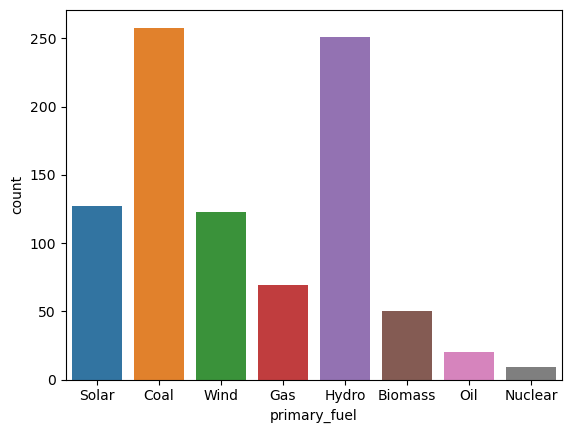

In [37]:
ax=sns.countplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


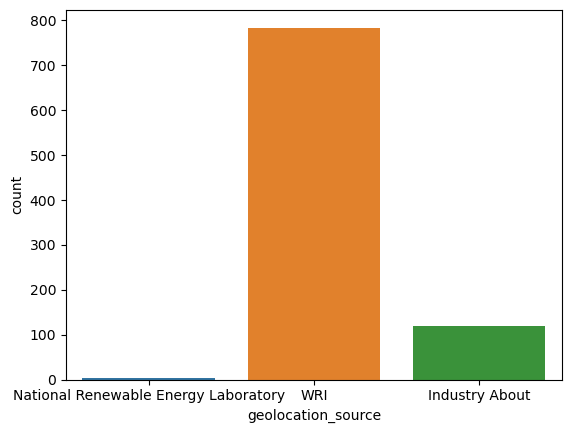

In [38]:
ax=sns.countplot(x='geolocation_source',data=df)
print(df['geolocation_source'].value_counts())

Central Electricity Authority    907
Name: generation_data_source, dtype: int64


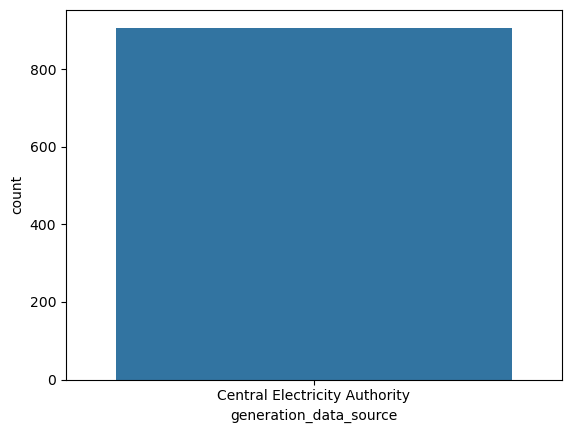

In [39]:
ax=sns.countplot(x='generation_data_source',data=df)
print(df['generation_data_source'].value_counts())

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


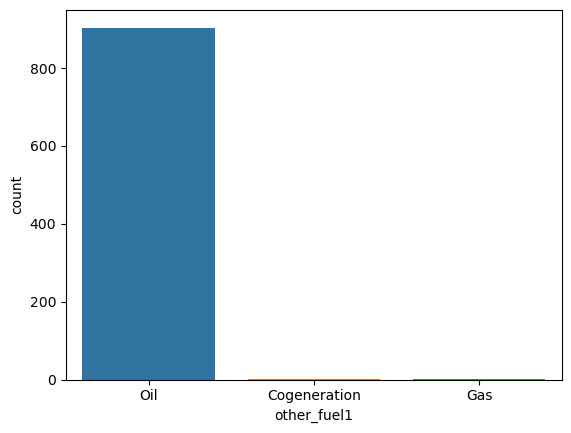

In [40]:
ax=sns.countplot(x='other_fuel1',data=df)
print(df['other_fuel1'].value_counts())

In [41]:
df_cont=df[continous_col]

In [42]:
df_cont.shape

(907, 9)

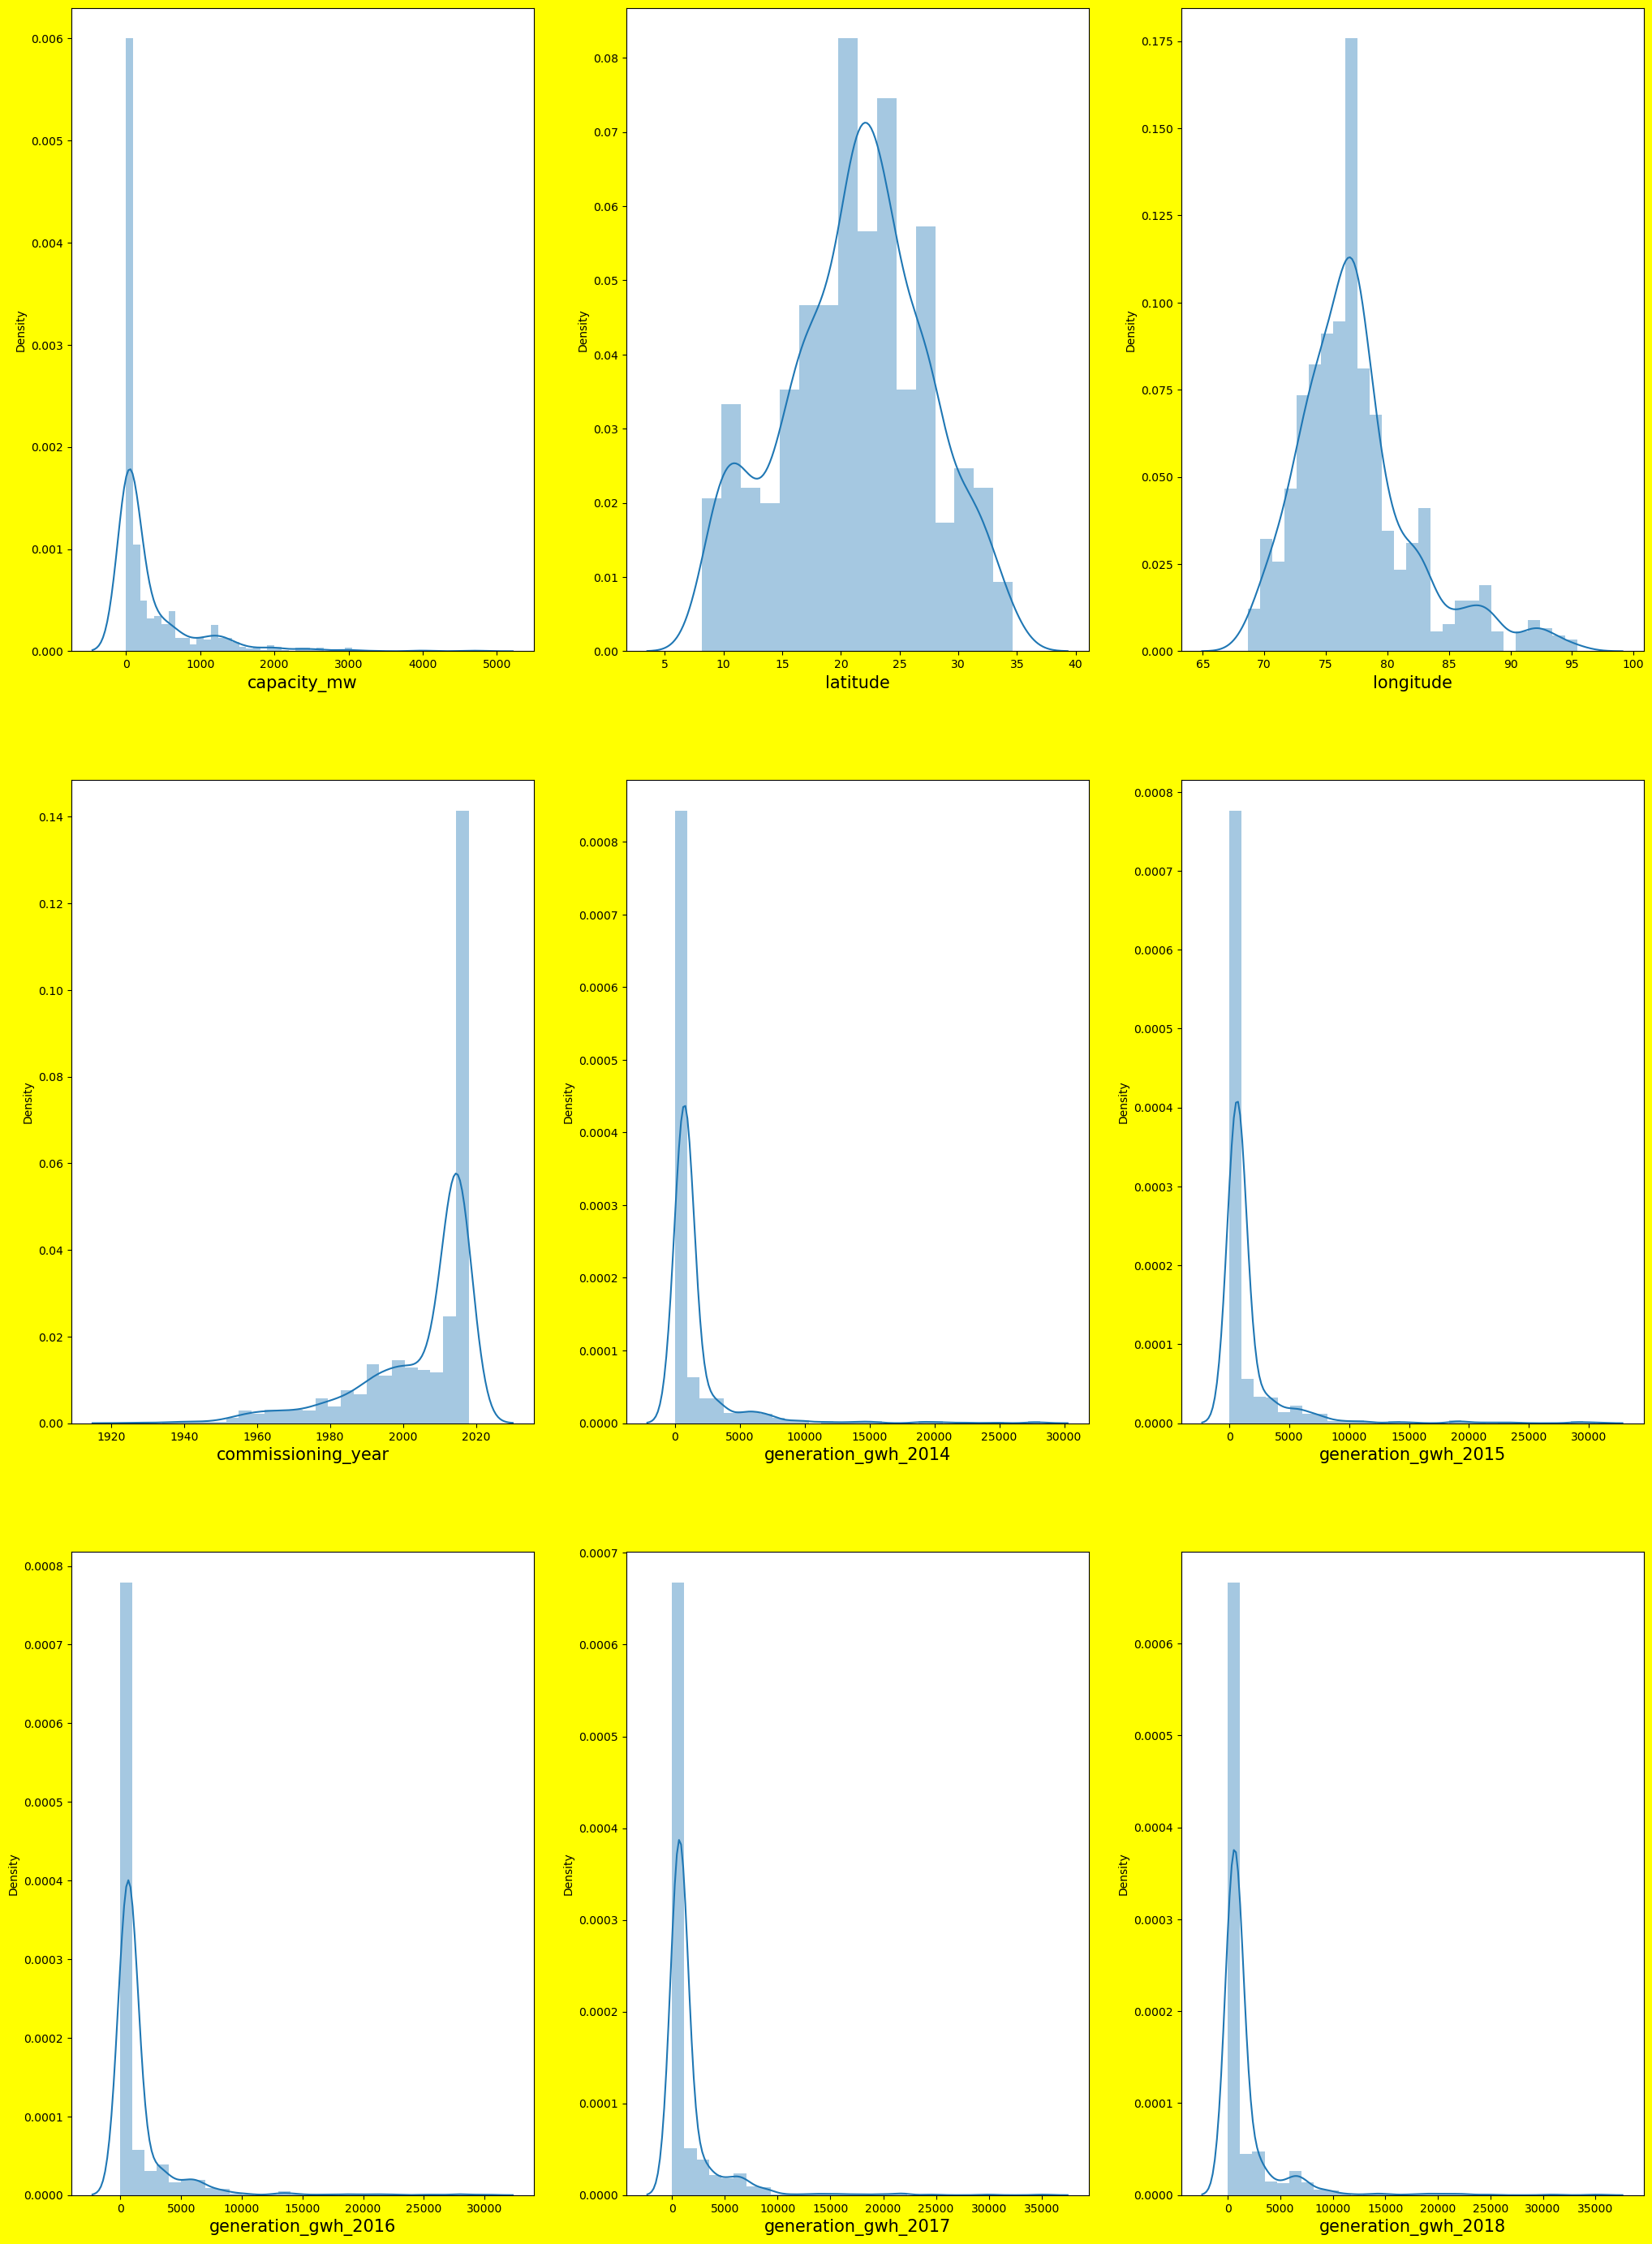

In [43]:
plt.figure(figsize=(25,35),facecolor='yellow')
plotnumber=1

for column in df_cont :
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_cont[column])
        plt.xlabel(column,fontsize=15)
    plotnumber=plotnumber+1

plt.show()

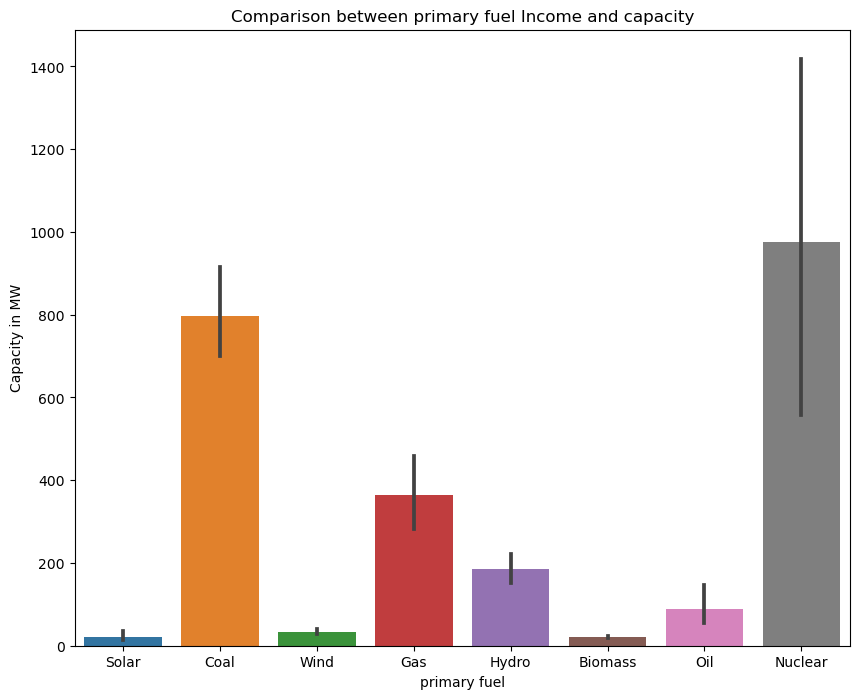

In [44]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and capacity")
sns.barplot(df['primary_fuel'],df['capacity_mw'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("Capacity in MW")
plt.show()

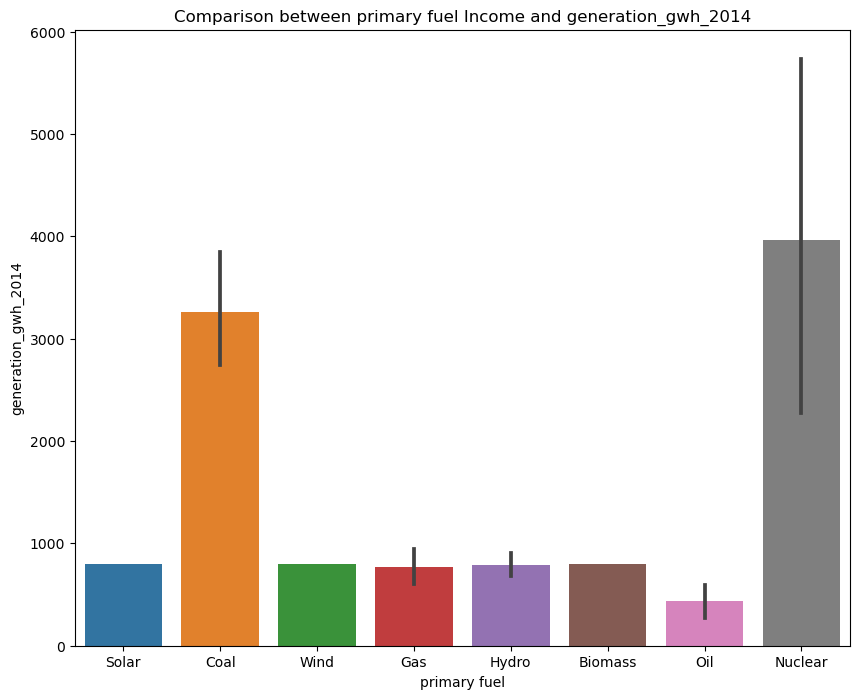

In [45]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2014")
sns.barplot(df['primary_fuel'],df['generation_gwh_2014'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2014")
plt.show()

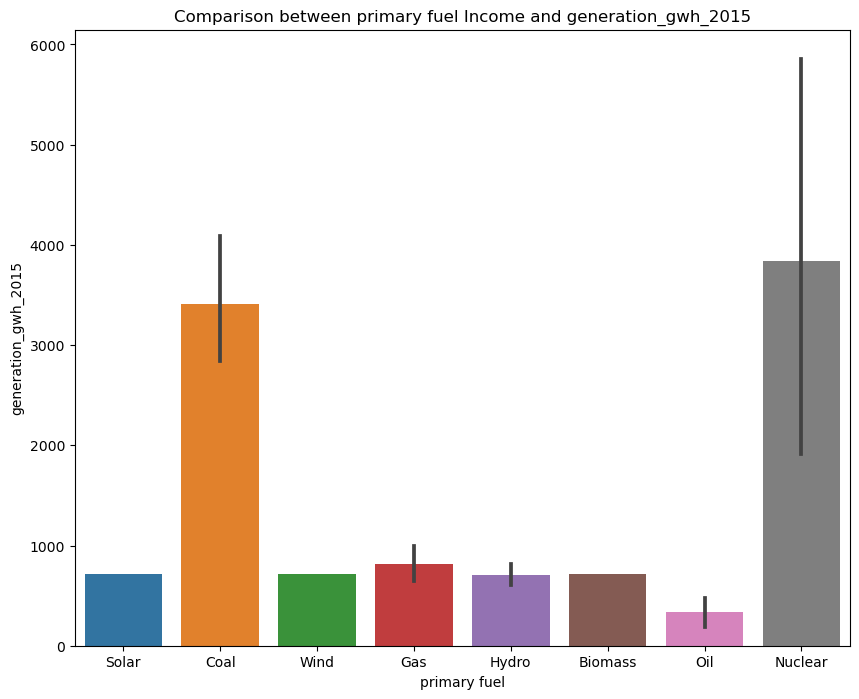

In [46]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2015")
sns.barplot(df['primary_fuel'],df['generation_gwh_2015'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2015")
plt.show()

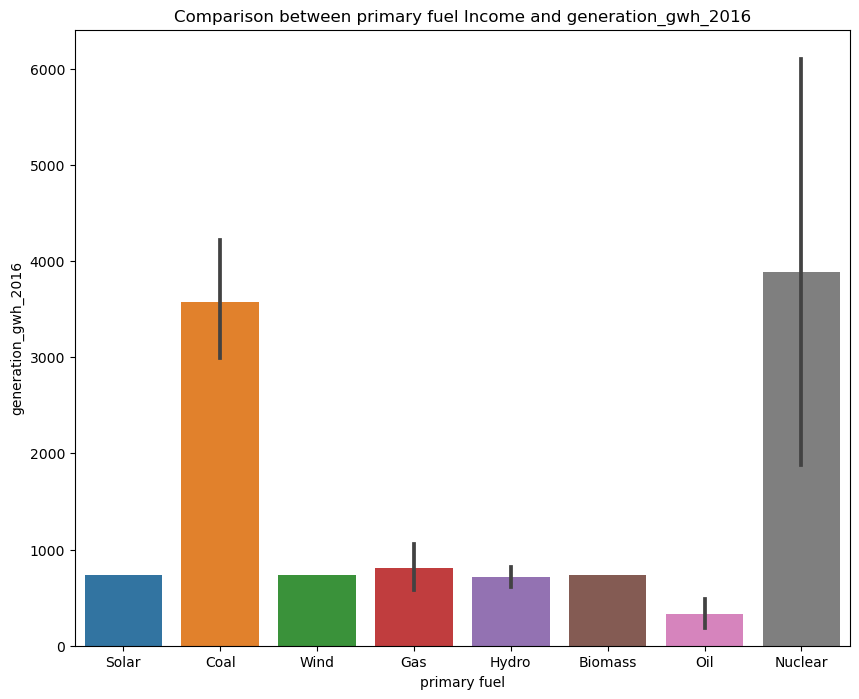

In [47]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2016")
sns.barplot(df['primary_fuel'],df['generation_gwh_2016'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2016")
plt.show()

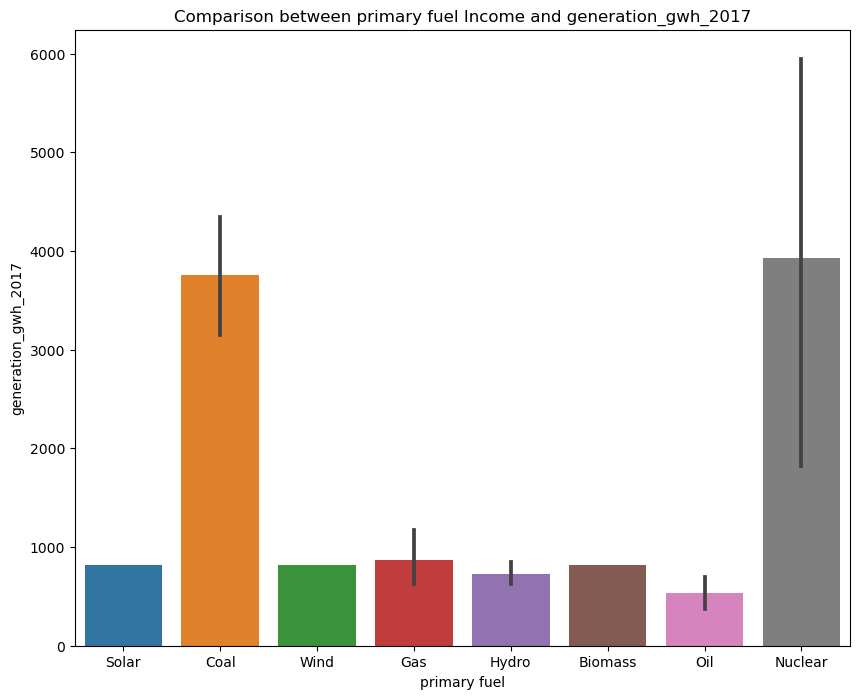

In [48]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2017")
sns.barplot(df['primary_fuel'],df['generation_gwh_2017'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2017")
plt.show()

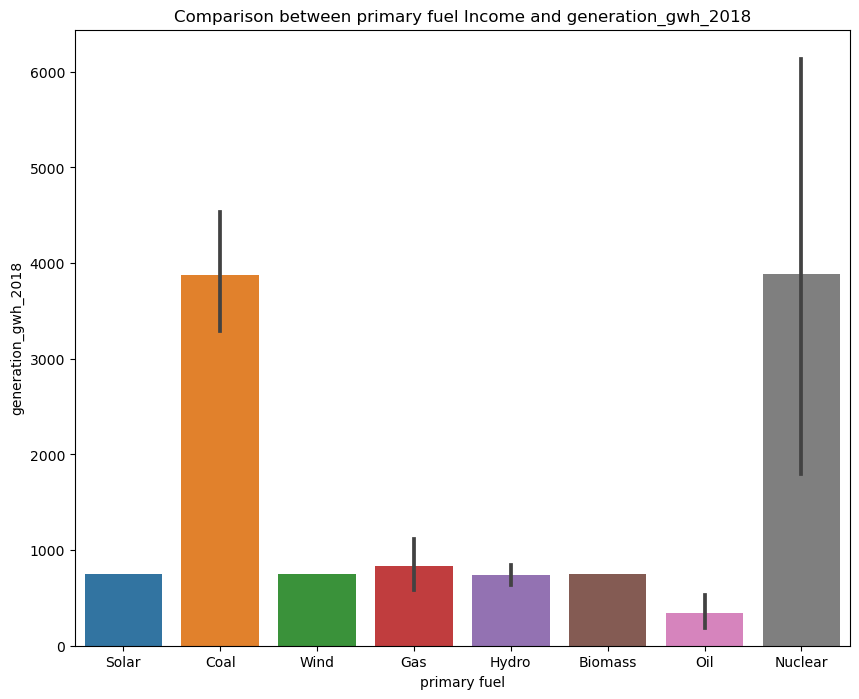

In [49]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2018")
sns.barplot(df['primary_fuel'],df['generation_gwh_2018'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2018")
plt.show()

# Now using encoder to encode the target variable

In [50]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [51]:
for i in categorical_col:
    df[i]=enc.fit_transform(df[i])

In [52]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
geolocation_source          int32
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

We can observe that categorical columns are converted into numerical

# Checking for Correlation

In [53]:
df=df.drop(columns=['generation_data_source'],axis=1)

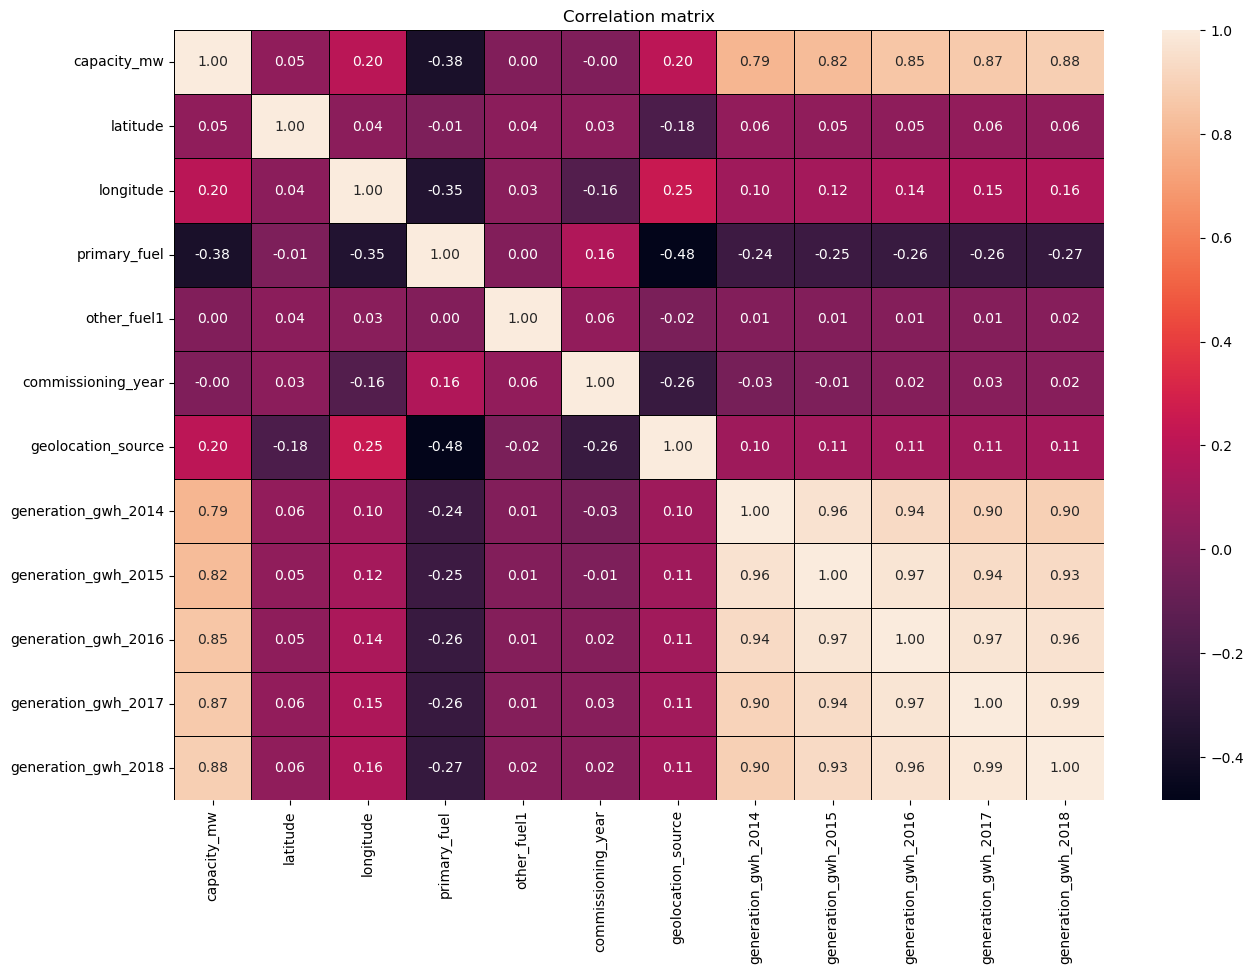

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

This heatmap shows the correlation matrix. We can visualize the relation between the feature to feature and feature to label.This heatmap contains both positive and negative correlation.

CORELATION BETWEEN CAPACITY MW AND FEATURES

---- The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.

-----And the label is negatively correlated with the features primary_fuel, source and Powe_plant_age.

-----The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

CORELATION BETWEEN PRIMARY_FUEL AND FEATURES

------The label primary_fuel is less correlated with Power_plant_age and source.

------The label is negatively correlated with geological_source, longitude,capacity_mw, and all generation_gwh years. Also the features other_fuel1 and latitude have very less correlation with both the lables. We can drop these columns.

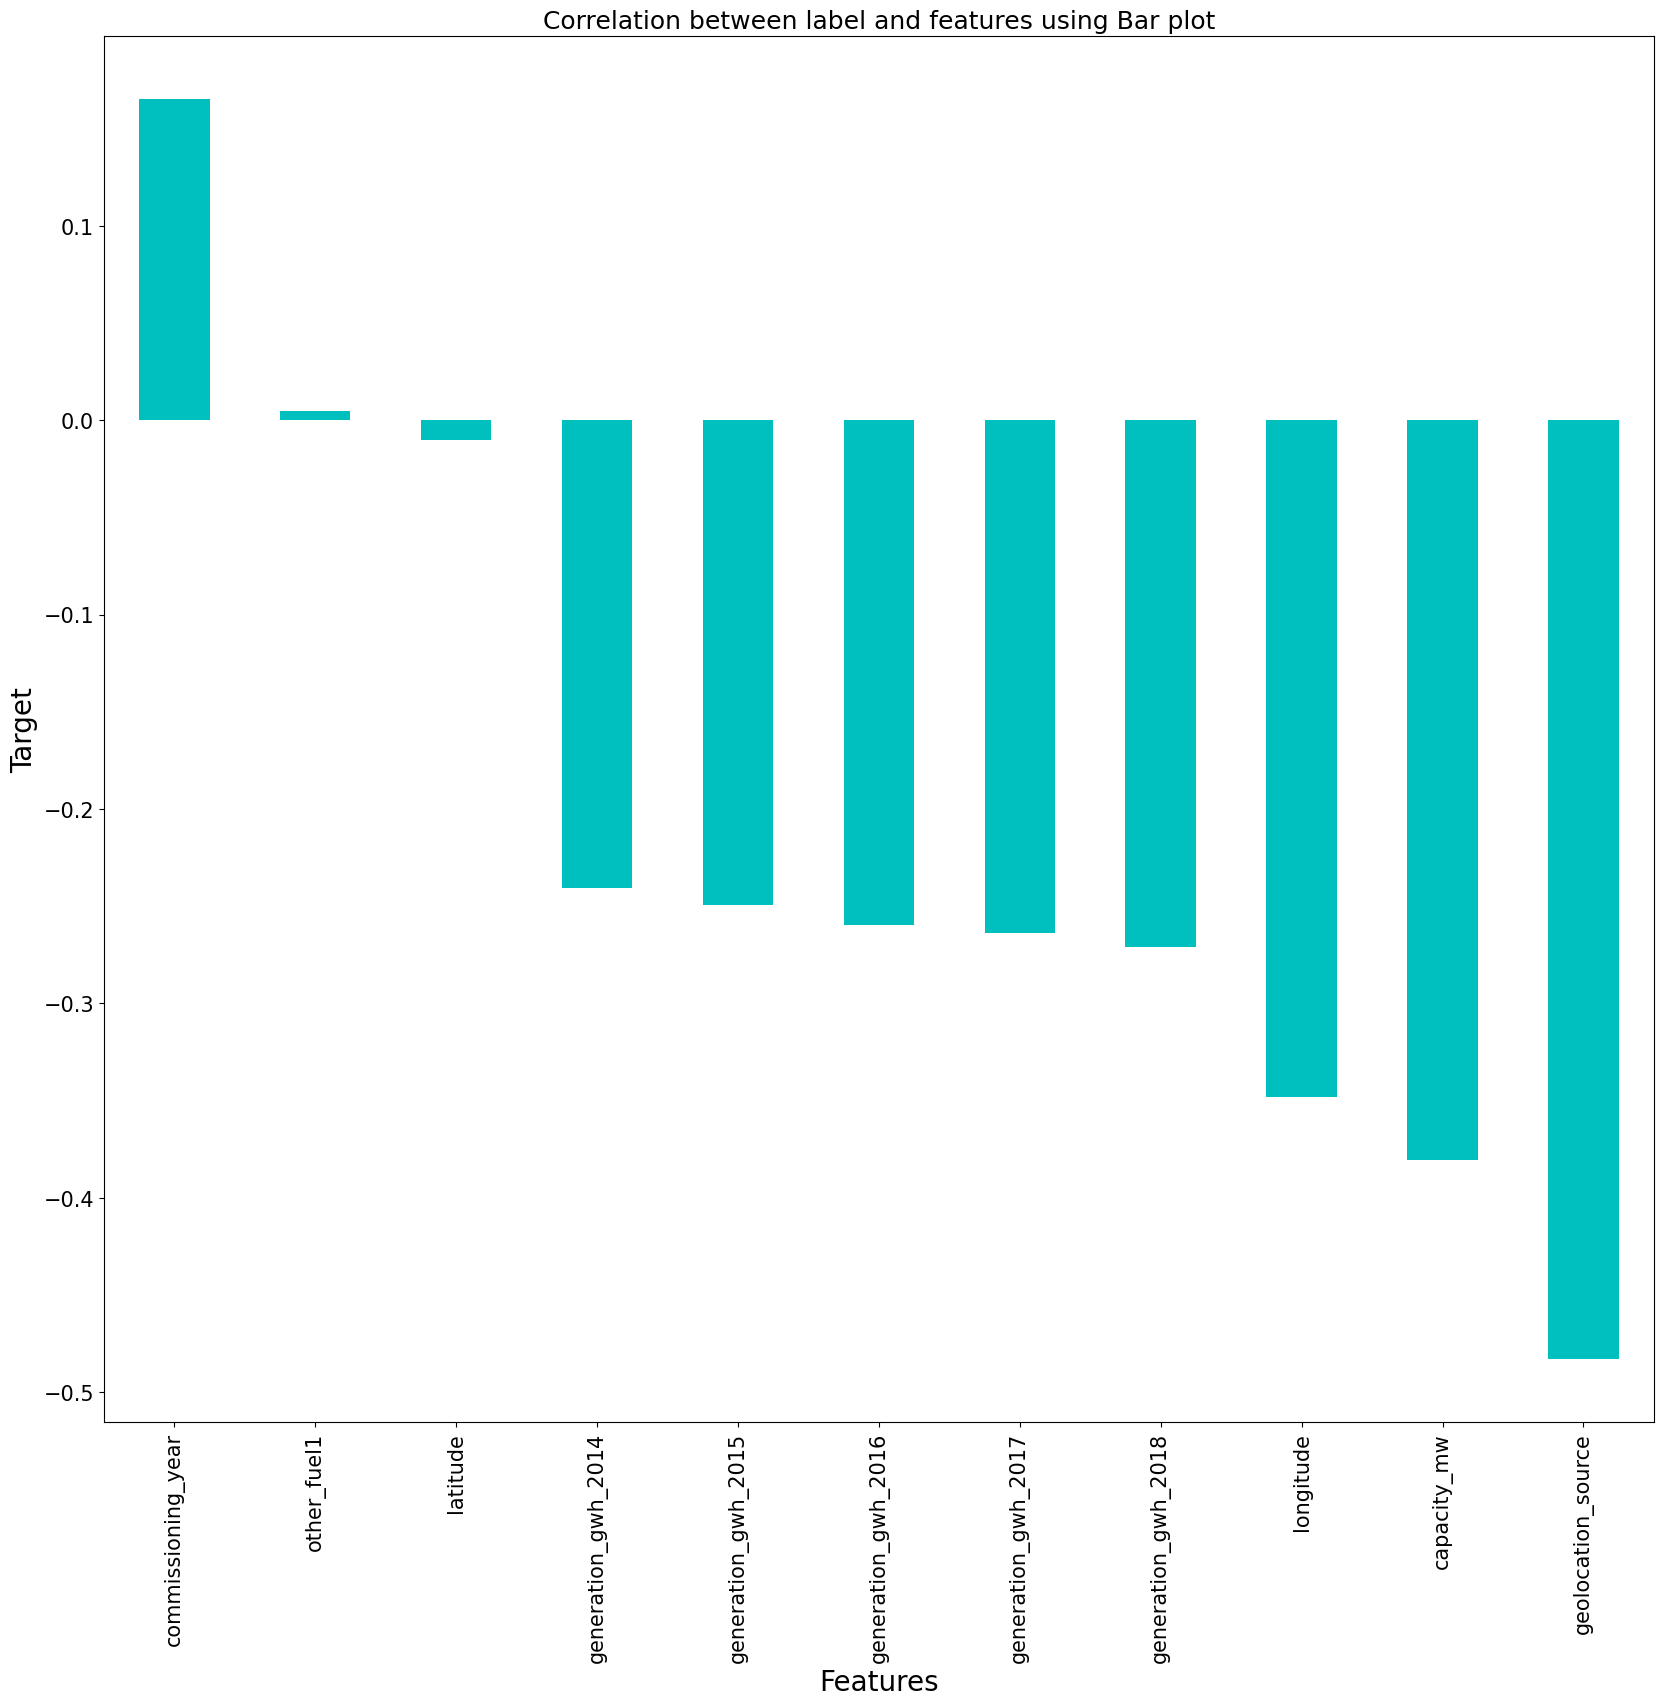

In [56]:
plt.figure(figsize=(20,18))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

POSITEVLY CORELATED COLUMN-: ['Commissioning_year']

NEGATIVELY CORELATED COLUMN-:['latitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018', 'longitude','capacity_mw','geolocation_source']

# Checking Skewness

In [57]:
df=df.drop(columns=['latitude','other_fuel1'],axis=1)

In [58]:
df.skew()

capacity_mw            3.123576
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.714873
geolocation_source    -2.159841
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

Setting skewness level to -0.65 to +0.65 as, We can observe that all columns are highly skewed

# Checking for Outliers

In [59]:
df.shape

(907, 10)

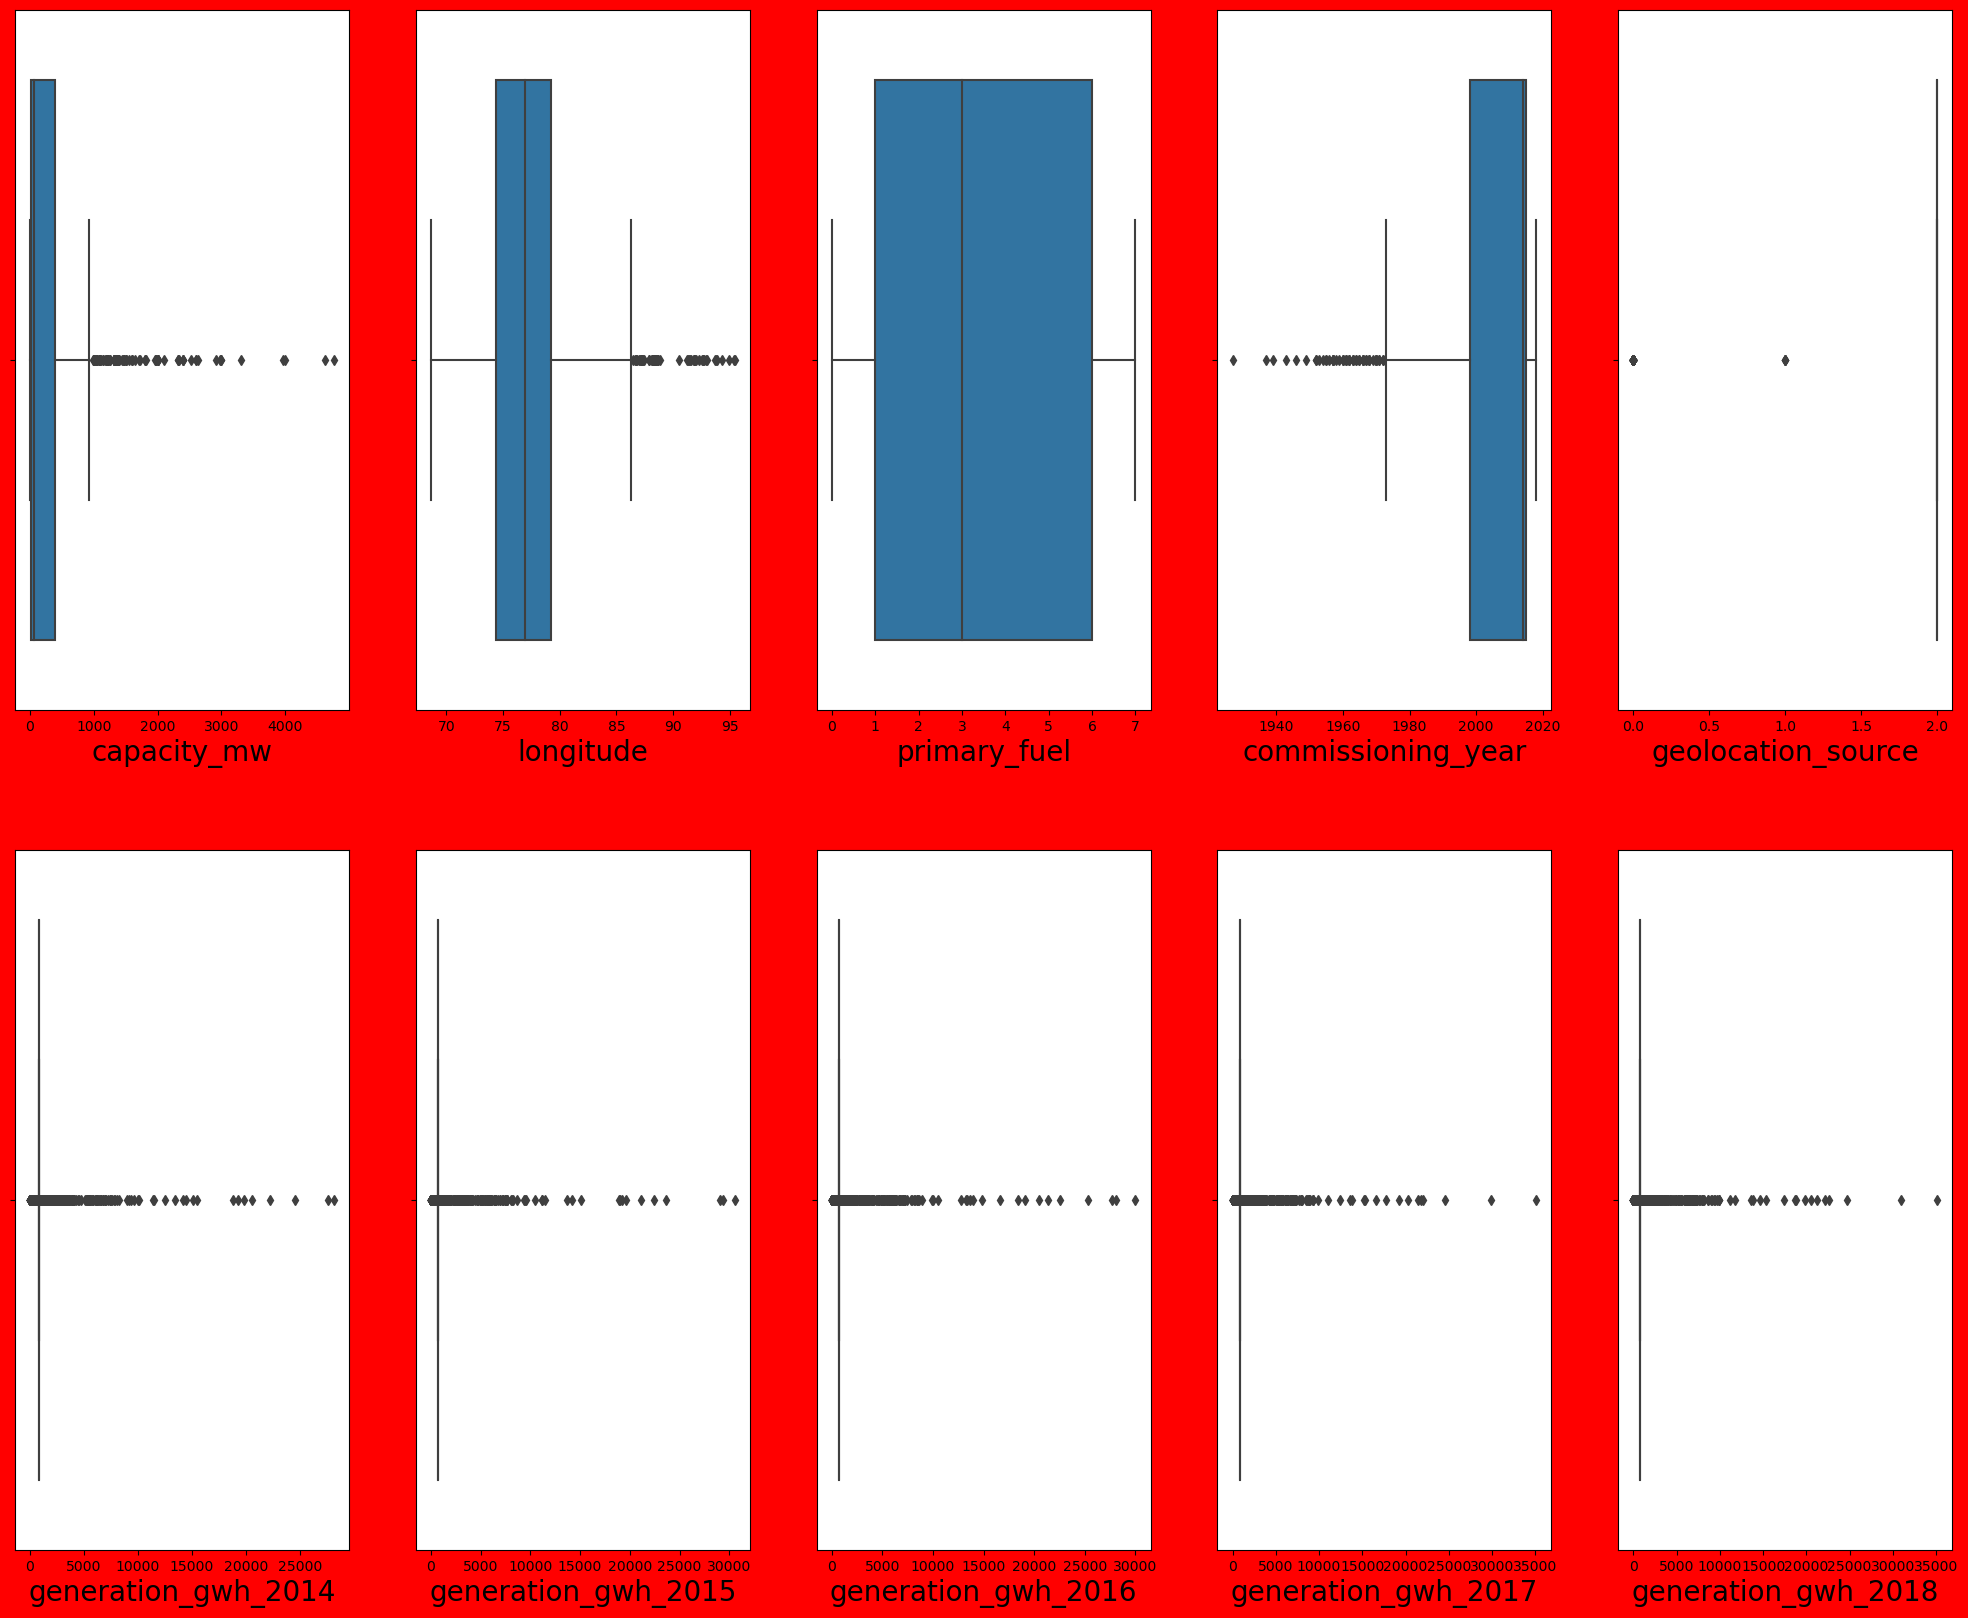

In [60]:
plt.figure(figsize=(25,20),facecolor= 'red')
plotnumber = 1


for column in df:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        ax=sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can observe that all the features are having large number of outliers.

# Data Preprocessing

# Removing Outliers using Z-technique

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape
z

,capacity_mw,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.225688,0.407327,1.083349,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.386977,0.593788,0.967877,0.661679,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394
2,0.486679,1.682394,1.664401,0.661679,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394
3,0.324240,2.889052,0.529164,0.037788,0.394241,0.322873,0.223348,0.226194,0.326203,0.327990
4,2.498942,1.027976,0.967877,0.661679,0.394241,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.022477,0.967877,0.725267,0.394241,0.257022,0.505833,0.443415,0.259992,0.308963
903,0.548060,0.145644,1.225688,0.661679,2.560940,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.509909,0.391673,1.664401,0.661679,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.417498,0.772866,0.967877,0.661679,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394


In [62]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (907, 10)
new dataframe (848, 10)
total number of rows dropped 59


# Percentage data loss

In [63]:
loss_percent=(907-848)/907*100
loss_percent

6.504961411245866

We can see that data loss is less than 10%.So its safe to remove outliers

# Separating features and target variable as x and y

In [64]:
x=df_new.drop(columns=['primary_fuel'],axis=1)
y=df_new['primary_fuel']

In [65]:
x.shape

(848, 9)

In [66]:
y.shape

(848,)

# Handling imbalanced dataset

# Over sampling using SMOTE

In [67]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [68]:
y.value_counts()

1    233
3    222
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [69]:
over_smpl=SMOTE()
x_new,y_new=over_smpl.fit_resample(x,y)

In [70]:
print("The number of classes before fit{}".format(Counter(y)))

The number of classes before fitCounter({1: 233, 3: 222, 6: 126, 7: 123, 2: 65, 0: 50, 5: 20, 4: 9})


In [71]:
print("The number of classes after fit{}".format(Counter(y_new)))

The number of classes after fitCounter({6: 233, 1: 233, 7: 233, 2: 233, 3: 233, 0: 233, 5: 233, 4: 233})


# Removing skewness using data transforamtion

In [72]:
from sklearn.preprocessing import power_transform

x_new=power_transform(x_new,method='yeo-johnson')
x_new

array([[-1.79493409, -0.90831142,  0.31172553, ..., -0.00355702,
        -0.02717023, -0.00456317],
       [ 0.21547087, -0.4008471 ,  0.76242714, ..., -0.00355702,
        -0.02717023, -0.00456317],
       [-0.29762129, -2.73303642,  0.76242714, ..., -0.00355702,
        -0.02717023, -0.00456317],
       ...,
       [-0.14514572, -2.27968304,  0.76242714, ..., -0.00355702,
        -0.02717023, -0.00456317],
       [-0.59351866,  0.4822371 ,  0.76242714, ..., -0.00355702,
        -0.02717023, -0.00456317],
       [-0.15566108, -0.27897253,  0.76242714, ..., -0.00355702,
        -0.02717023, -0.00456317]])

In [73]:
x=pd.DataFrame(x_new,columns=x.columns)

In [74]:
x

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.794934,-0.908311,0.311726,-2.536369,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1,0.215471,-0.400847,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
2,-0.297621,-2.733036,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
3,0.391415,2.769680,-0.384517,0.374228,-0.263703,0.089662,0.134081,-0.182040,-0.132482
4,1.734408,1.590288,0.762427,0.374228,1.318015,2.166754,2.131452,1.909388,2.312335
...,...,...,...,...,...,...,...,...,...
1859,-0.903404,0.006839,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1860,-0.541089,-0.345789,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1861,-0.145146,-2.279683,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1862,-0.593519,0.482237,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563


In [75]:
x.skew()

capacity_mw            0.023344
longitude             -0.042075
commissioning_year    -1.001264
geolocation_source    -2.300090
generation_gwh_2014    0.153956
generation_gwh_2015    0.125830
generation_gwh_2016    0.055540
generation_gwh_2017    0.076855
generation_gwh_2018    0.046227
dtype: float64

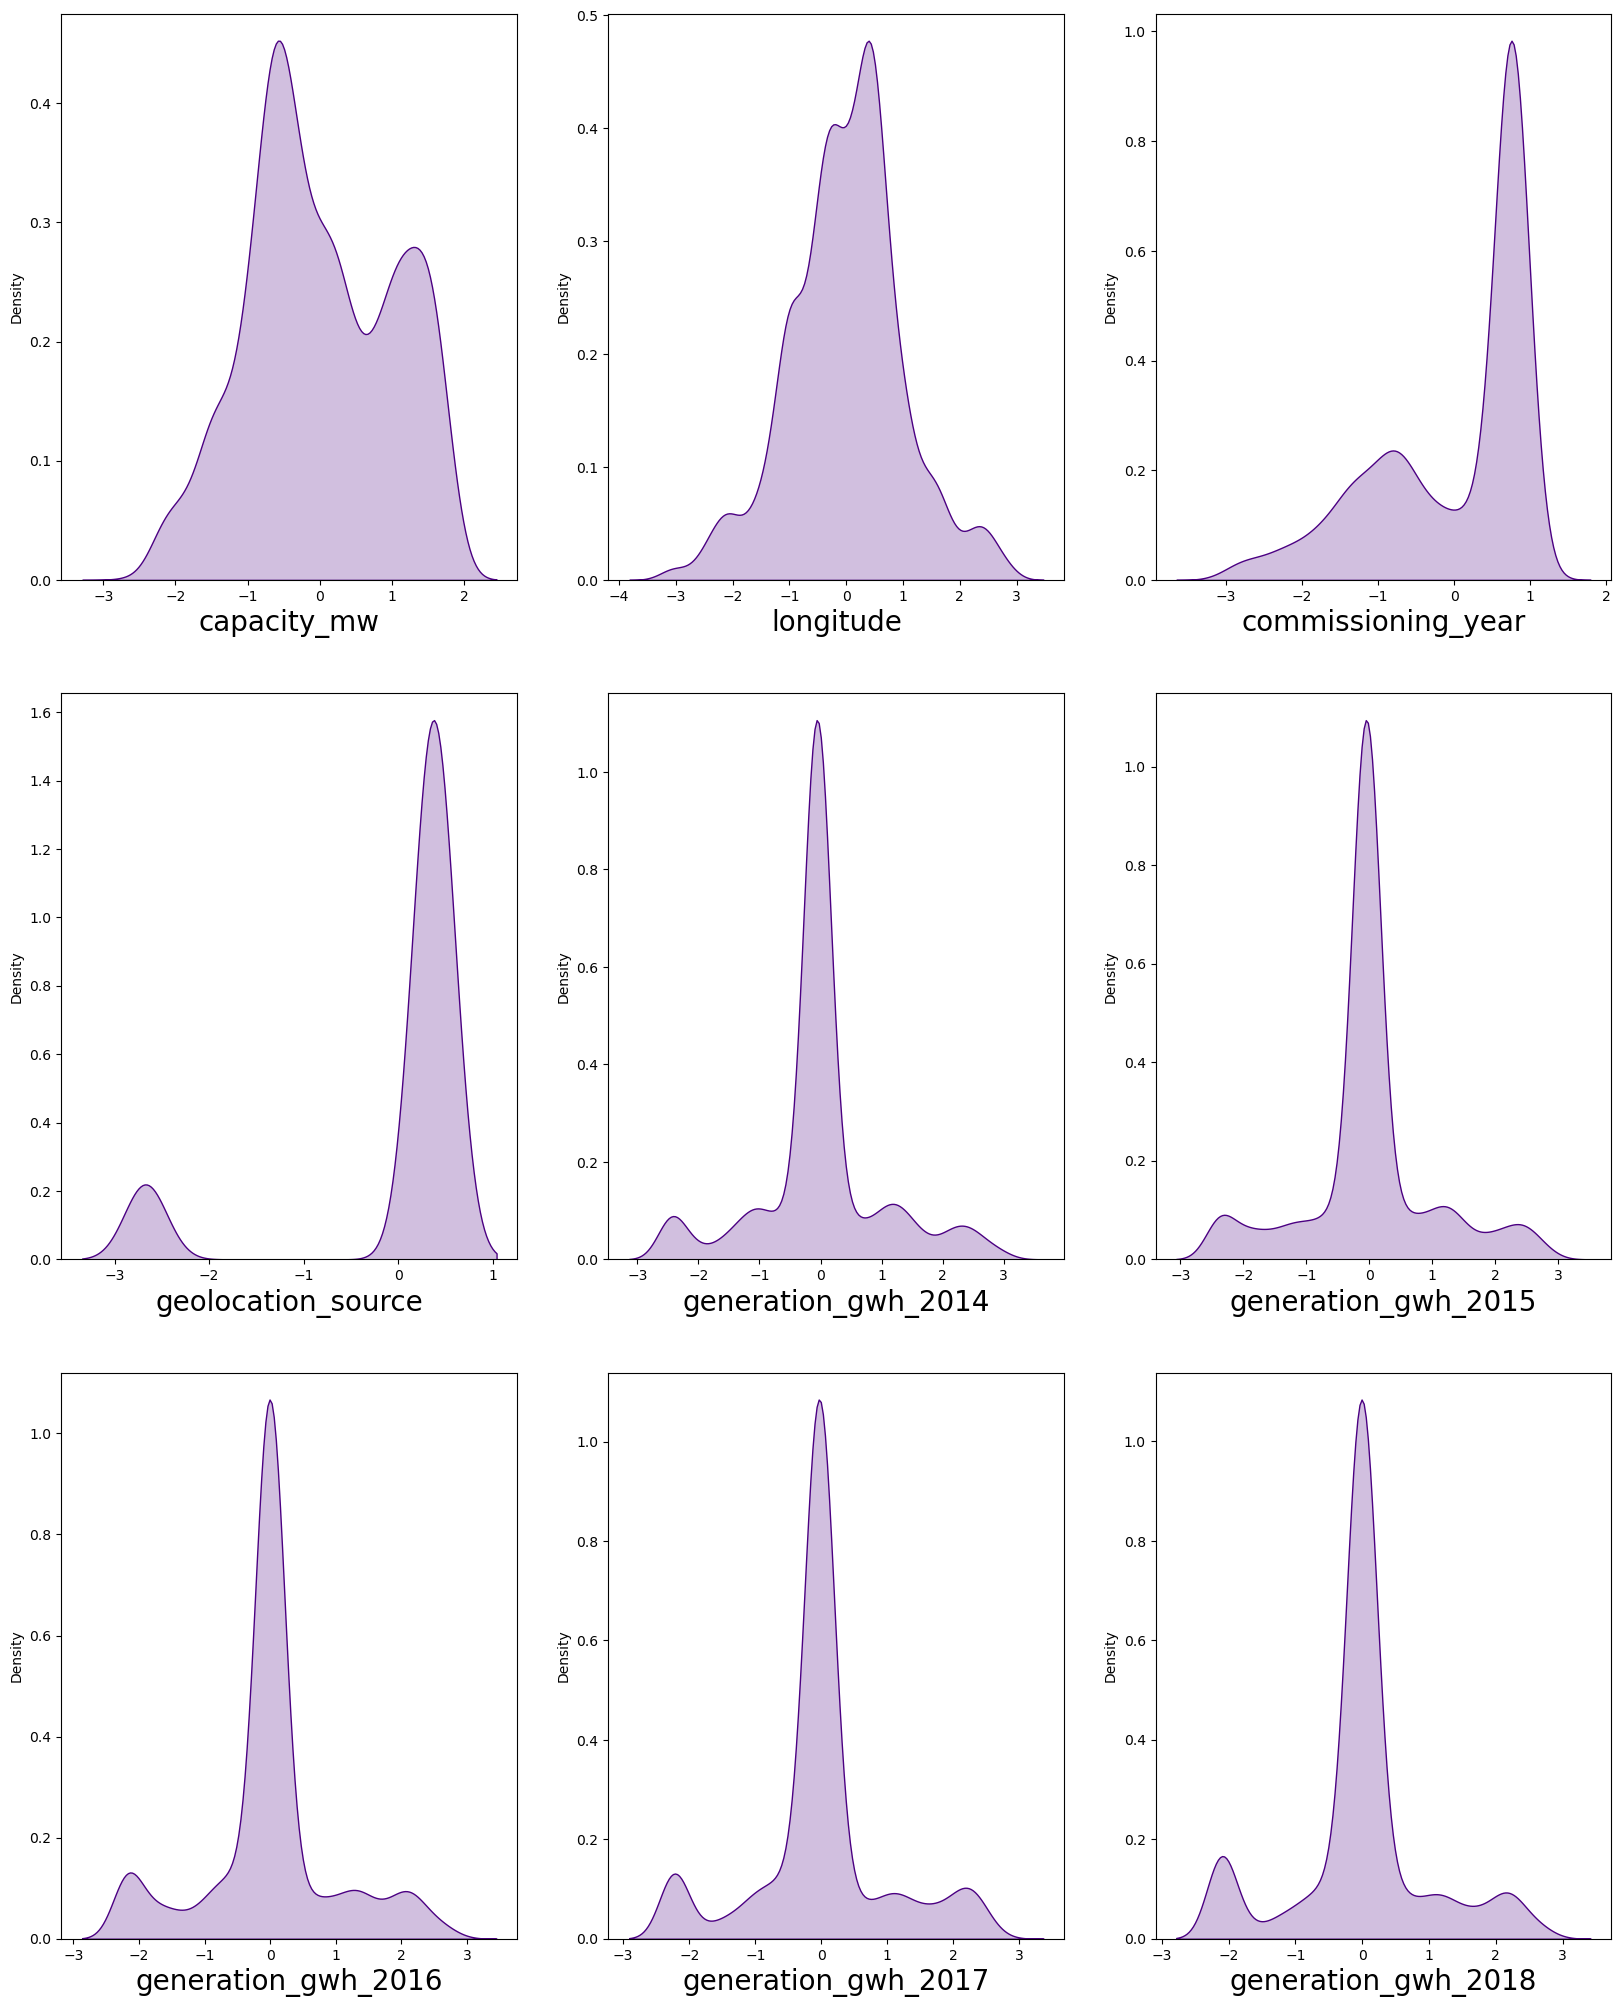

In [76]:
# Visualizing the distribution after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Data Standardisation

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.794934,-0.908276,0.311726,-2.536369,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1,0.215471,-0.400812,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
2,-0.297621,-2.733001,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
3,0.391415,2.769716,-0.384517,0.374228,-0.263703,0.089662,0.134081,-0.182040,-0.132482
4,1.734408,1.590324,0.762427,0.374228,1.318015,2.166754,2.131452,1.909388,2.312335
...,...,...,...,...,...,...,...,...,...
1859,-0.903404,0.006875,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1860,-0.541089,-0.345754,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1861,-0.145146,-2.279647,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563
1862,-0.593519,0.482273,0.762427,0.374228,-0.054423,-0.045174,-0.003557,-0.027170,-0.004563


# Check for multicollinearity

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.789088,capacity_mw
1,1.158047,longitude
2,1.381540,commissioning_year
3,1.338549,geolocation_source
4,6.032689,generation_gwh_2014
5,9.938036,generation_gwh_2015
6,15.578917,generation_gwh_2016
7,7.737827,generation_gwh_2017
8,10.919297,generation_gwh_2018


We can observe that VIF value for columns(gneration_gwh_2016,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018) are greater than 5 . so We will remove one of them

In [79]:
x=x.drop(columns=['generation_gwh_2016'],axis=1)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.788130,capacity_mw
1,1.142341,longitude
2,1.350384,commissioning_year
3,1.338548,geolocation_source
4,6.022545,generation_gwh_2014
5,7.371908,generation_gwh_2015
6,6.198998,generation_gwh_2017
7,9.361992,generation_gwh_2018


In [81]:
x=x.drop(columns=['generation_gwh_2018'],axis=1)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.787825,capacity_mw
1,1.140388,longitude
2,1.319296,commissioning_year
3,1.338524,geolocation_source
4,5.871492,generation_gwh_2014
5,6.514555,generation_gwh_2015
6,3.242396,generation_gwh_2017


We can observe that VIF for all columns are less than 5 .

# Model Training and Building

# Decision Tree

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

# Finding the best random state

In [84]:
max_acc=0
max_rs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y_new,random_state=i,test_size=0.20)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred_dt=dt.predict(x_test)
    accuracy=accuracy_score(y_test,pred_dt)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.7479892761394102 random state 0
max_accuracy 0.7479892761394102 max_random_state 0
Testing accuracy 0.8042895442359249 random state 1
max_accuracy 0.8042895442359249 max_random_state 1
Testing accuracy 0.7989276139410187 random state 2
Testing accuracy 0.7721179624664879 random state 3
Testing accuracy 0.7855227882037533 random state 4
Testing accuracy 0.7908847184986595 random state 5
Testing accuracy 0.8096514745308311 random state 6
max_accuracy 0.8096514745308311 max_random_state 6
Testing accuracy 0.7989276139410187 random state 7
Testing accuracy 0.7882037533512064 random state 8
Testing accuracy 0.7801608579088471 random state 9
Testing accuracy 0.7560321715817694 random state 10
Testing accuracy 0.7828418230563002 random state 11
Testing accuracy 0.7828418230563002 random state 12
Testing accuracy 0.7962466487935657 random state 13
Testing accuracy 0.7828418230563002 random state 14
Testing accuracy 0.7962466487935657 random state 15
Testing accuracy 0.798927

We are getting maximum accuracy at random state 100

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y_new,random_state=100,test_size=0.20)

In [86]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [87]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:100.000000%


In [89]:
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:83.914209%
Classification report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        48
           1       0.79      0.70      0.74        47
           2       0.83      0.80      0.81        44
           3       0.77      0.66      0.71        41
           4       0.77      0.94      0.85        47
           5       0.88      0.83      0.85        42
           6       1.00      0.96      0.98        55
           7       0.79      0.86      0.82        49

    accuracy                           0.84       373
   macro avg       0.84      0.83      0.83       373
weighted avg       0.84      0.84      0.84       373



# Finding best Cross validation score for decision tree:

In [90]:
pred_dt=dt.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_dt)
for j in range(2,10):
    cv_score=cross_val_score(dt,x,y_new,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 76.87768240343348

cv at  3
Cross validation score is :- 79.40145980362206

cv at  4
Cross validation score is :- 80.79399141630901

cv at  5
Cross validation score is :- 81.65427080630747

cv at  6
Cross validation score is :- 80.63530754071154

cv at  7
Cross validation score is :- 80.8514062041138

cv at  8
Cross validation score is :- 80.90128755364807

cv at  9
Cross validation score is :- 81.22600024773938



We are getting minimum difference between cross val score and testing accuracy at cv score=9

# Cross Validation Score

In [91]:
lssscore_selected=cross_val_score(dt,x,y_new,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8095735785953178


# Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix

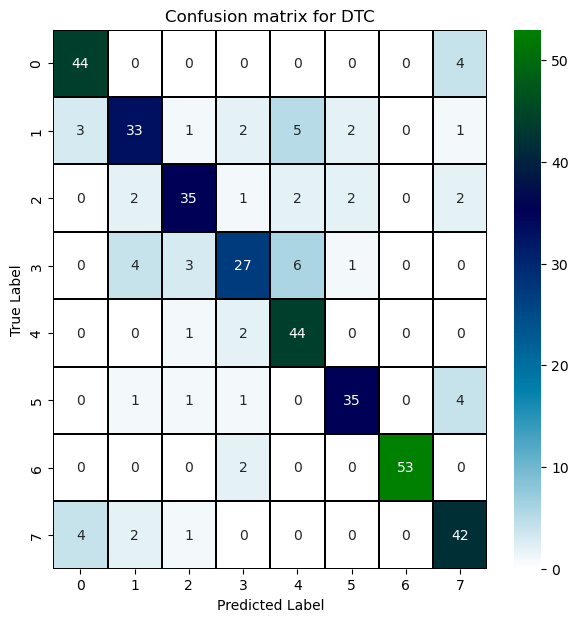

In [94]:
# Lets plot confusion matrix for DTC
conf_mat=confusion_matrix(y_test,pred_dt)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

# Support Vector Machine(SVM)

In [95]:
from sklearn.svm import SVC

In [96]:
svm=SVC()

svm.fit(x_train,y_train)

SVC()

In [97]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:77.196512%


In [98]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:73.190349%
Classification report
               precision    recall  f1-score   support

           0       0.53      0.96      0.68        48
           1       0.77      0.64      0.70        47
           2       0.69      0.61      0.65        44
           3       0.88      0.54      0.67        41
           4       0.75      1.00      0.85        47
           5       0.74      0.83      0.79        42
           6       1.00      0.96      0.98        55
           7       0.65      0.27      0.38        49

    accuracy                           0.73       373
   macro avg       0.75      0.73      0.71       373
weighted avg       0.75      0.73      0.72       373



# Cross Validation Score

In [99]:
lssscore_selected=cross_val_score(svm,x,y_new,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7521496552293654


# Confusion Matrix

In [100]:
pred_svm=svm.predict(x_test)

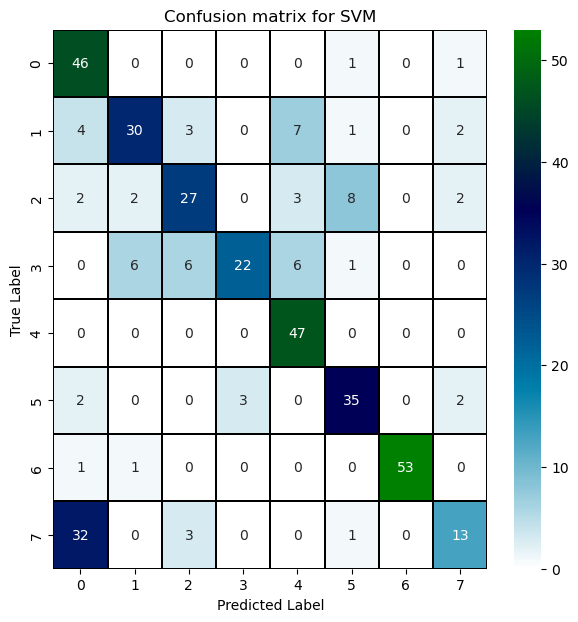

In [101]:
# Lets plot confusion matrix for SVM
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()

# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf=RandomForestClassifier()

In [104]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:100.000000%


In [106]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:87.399464%
Classification report
               precision    recall  f1-score   support

           0       0.81      0.98      0.89        48
           1       0.83      0.74      0.79        47
           2       0.86      0.84      0.85        44
           3       0.97      0.80      0.88        41
           4       0.87      1.00      0.93        47
           5       0.86      0.86      0.86        42
           6       1.00      0.96      0.98        55
           7       0.81      0.78      0.79        49

    accuracy                           0.87       373
   macro avg       0.88      0.87      0.87       373
weighted avg       0.88      0.87      0.87       373



# Cross Validation Score

In [107]:
lssscore_selected=cross_val_score(rf,x,y_new,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8626852884099261


# Confusion Matrix

In [108]:
pred_rf=rf.predict(x_test)

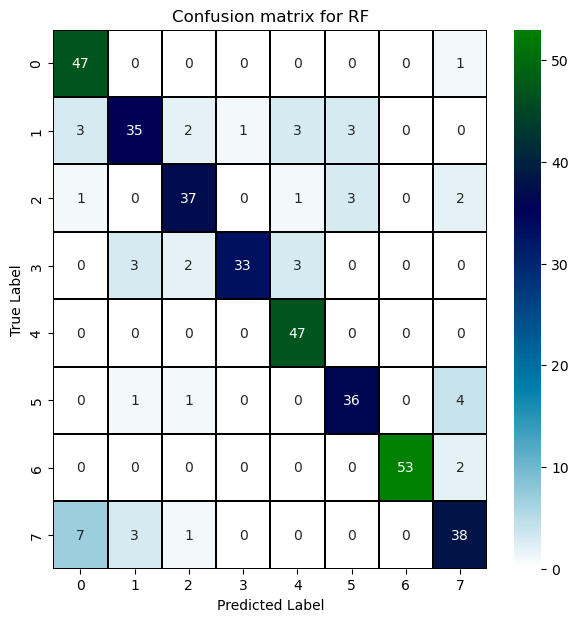

In [109]:
# Lets plot confusion matrix for RF
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()

# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn=KNeighborsClassifier()

In [112]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [113]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:86.519115%


In [114]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:80.428954%
Classification report
               precision    recall  f1-score   support

           0       0.75      0.98      0.85        48
           1       0.61      0.57      0.59        47
           2       0.71      0.68      0.70        44
           3       0.90      0.63      0.74        41
           4       0.82      0.98      0.89        47
           5       0.78      0.86      0.82        42
           6       1.00      0.96      0.98        55
           7       0.88      0.71      0.79        49

    accuracy                           0.80       373
   macro avg       0.81      0.80      0.80       373
weighted avg       0.81      0.80      0.80       373



# Cross Validation Score

In [115]:
lssscore_selected=cross_val_score(knn,x,y_new,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.806342644204963


# Confusion Matrix

In [116]:
pred_knn=knn.predict(x_test)

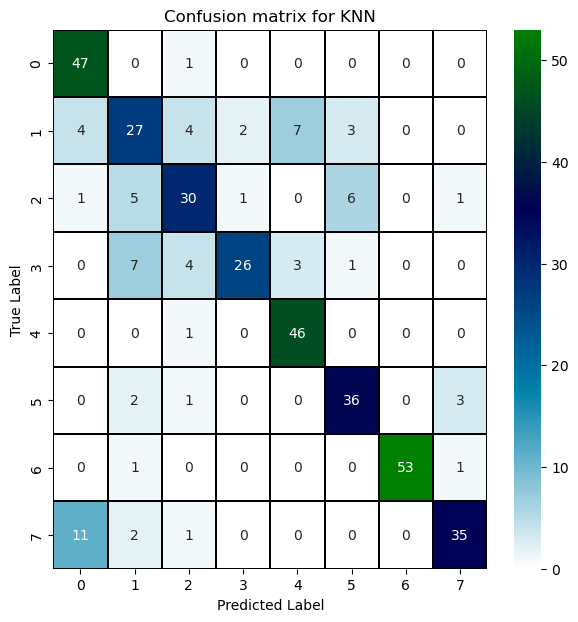

In [117]:
# Lets plot confusion matrix for KNN
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()

Conclusion
We can observe that at random state 18 and cv=8

SVM

------Testing Accuracy:76.13 and Cross val score:74.67--------

Random Forest

------Testing Accuracy:85.25 and Cross val score:81.6--------

Decision Tree

------Testing Accuracy:82.35 and Cross val score:73--------

KNN

------ Testing Accuracy:79.89 and Cross val score:80.57--------

We can say that Random Forest is the best model

# Hyperparameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
params={'n_estimators':[1,5,10],
       'criterion':['entropy','gini'],
       'max_depth':[10,20,30,40,50],
       'min_samples_split':[2,3,4,5,6,7,8,9,10],
       'bootstrap':[True,False],
       'min_samples_leaf':[2,3,4,5,6,7,8,9,10] 
       }

In [120]:
grd=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [121]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [1, 5, 10]})

In [122]:
print('best_parameters',grd.best_params_)

best_parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}


In [123]:
rf=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=30,min_samples_leaf=3,min_samples_split=6,n_estimators=10)


In [124]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=10)

In [125]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:95.640510%


In [126]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.522788%
Classification report
               precision    recall  f1-score   support

           0       0.78      0.96      0.86        48
           1       0.82      0.68      0.74        47
           2       0.78      0.80      0.79        44
           3       0.91      0.76      0.83        41
           4       0.87      0.98      0.92        47
           5       0.88      0.86      0.87        42
           6       1.00      0.96      0.98        55
           7       0.82      0.82      0.82        49

    accuracy                           0.86       373
   macro avg       0.86      0.85      0.85       373
weighted avg       0.86      0.86      0.85       373



# Cross Validation Score

In [127]:
lssscore_selected=cross_val_score(rf,x,y_new,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8374778066807053


# Saving the model

In [128]:
import pickle
pickle.dump(rf,open('classmodel_primary_fuel','wb'))

# ***************************************************************************************************************

# Task 2

# Now predicting capacity_mw as target variable and doing analysis as a regression problem.

In [129]:
df_new

,capacity_mw,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,73.2407,6,2011.0,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,74.6090,1,2015.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,69.3732,7,2015.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,77.3568,1,2016.0,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,78.1654,6,2015.0,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,75.5811,7,2015.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,73.7477,1,2015.0,2,801.123775,711.181225,737.205450,817.977250,751.644375


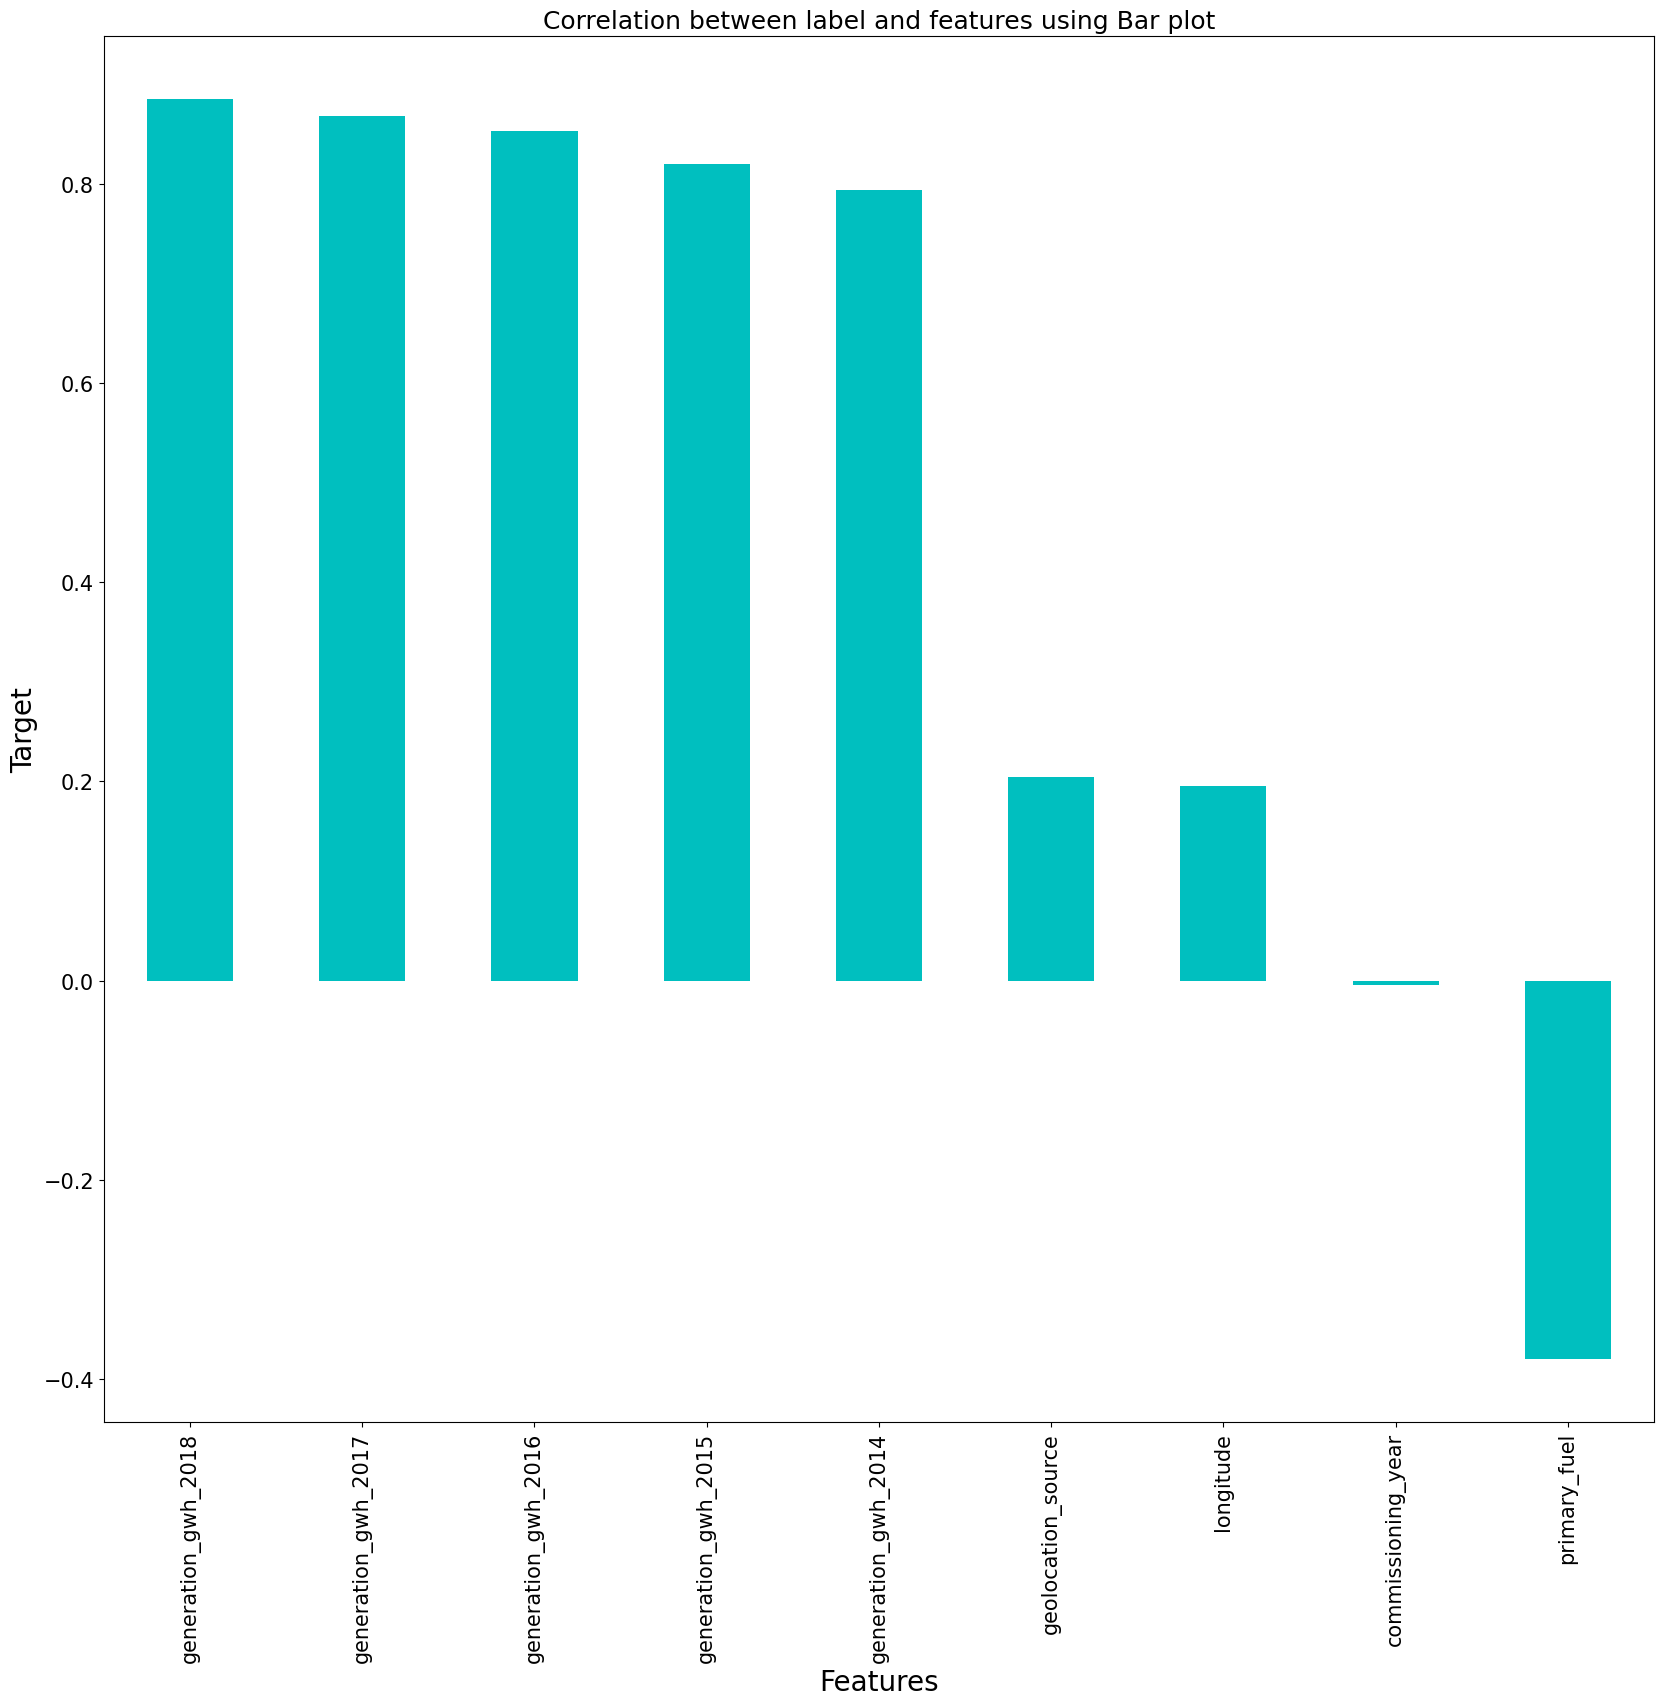

In [130]:
plt.figure(figsize=(20,18))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

In [131]:
x=df_new.drop(columns=['capacity_mw','commissioning_year'],axis=1)
y=df_new['capacity_mw']

Dropped Column (commissioning_year) as it has no relationship with target variable

# Removing skewness using Datatransfromation

In [133]:
from sklearn.preprocessing import power_transform


x_new=power_transform(x,method='yeo-johnson',)
x_new

array([[-0.92678622,  1.13042907, -2.23385002, ..., -0.03917204,
        -0.02407679, -0.04571517],
       [-0.50777723, -1.00500003,  0.40988965, ..., -0.03917204,
        -0.02407679, -0.04571517],
       [-2.36404252,  1.40452725,  0.40988965, ..., -0.03917204,
        -0.02407679, -0.04571517],
       ...,
       [-0.23381295,  1.40452725,  0.40988965, ..., -0.03917204,
        -0.02407679, -0.04571517],
       [-0.76673928, -1.00500003,  0.40988965, ..., -0.03917204,
        -0.02407679, -0.04571517],
       [ 0.25003456,  1.40452725,  0.40988965, ..., -0.03917204,
        -0.02407679, -0.04571517]])

In [134]:
x=pd.DataFrame(x_new,columns=x.columns)

In [135]:
x

,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.926786,1.130429,-2.23385,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
1,-0.507777,-1.005000,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
2,-2.364043,1.404527,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
3,2.440084,-0.392619,0.40989,-0.261849,0.103243,0.113738,-0.190297,-0.184852
4,1.254470,-1.005000,0.40989,1.434001,2.304422,2.302804,2.022370,2.413626
...,...,...,...,...,...,...,...,...
843,0.221238,-1.005000,0.40989,-0.036828,-2.463004,-0.840762,0.022495,-0.115690
844,0.410817,1.130429,-2.44614,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
845,-0.233813,1.404527,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
846,-0.766739,-1.005000,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715


In [136]:
x.skew().sort_values()

geolocation_source    -2.033936
primary_fuel          -0.060684
longitude              0.000123
generation_gwh_2017    0.131077
generation_gwh_2018    0.137150
generation_gwh_2016    0.153749
generation_gwh_2015    0.168709
generation_gwh_2014    0.234635
dtype: float64

# Data Standardisation

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.926786,1.130429,-2.23385,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
1,-0.507777,-1.005000,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
2,-2.364042,1.404527,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
3,2.440084,-0.392619,0.40989,-0.261849,0.103243,0.113738,-0.190297,-0.184852
4,1.254470,-1.005000,0.40989,1.434001,2.304422,2.302804,2.022370,2.413626
...,...,...,...,...,...,...,...,...
843,0.221238,-1.005000,0.40989,-0.036828,-2.463004,-0.840762,0.022495,-0.115690
844,0.410817,1.130429,-2.44614,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
845,-0.233813,1.404527,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715
846,-0.766739,-1.005000,0.40989,-0.036828,-0.040243,-0.039172,-0.024077,-0.045715


# Check for multicollinearity

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.206910,longitude
1,1.430044,primary_fuel
2,1.320272,geolocation_source
3,3.542636,generation_gwh_2014
4,6.236037,generation_gwh_2015
5,10.641561,generation_gwh_2016
6,9.692441,generation_gwh_2017
7,9.210263,generation_gwh_2018


In [139]:
x=x.drop(columns=['generation_gwh_2016'],axis=1)

In [140]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.201053,longitude
1,1.428141,primary_fuel
2,1.318664,geolocation_source
3,3.539926,generation_gwh_2014
4,4.346268,generation_gwh_2015
5,8.481054,generation_gwh_2017
6,8.604578,generation_gwh_2018


In [141]:
x=x.drop(columns=['generation_gwh_2018'],axis=1)

In [142]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.193119,longitude
1,1.427880,primary_fuel
2,1.318560,geolocation_source
3,3.517920,generation_gwh_2014
4,4.277957,generation_gwh_2015
5,2.581797,generation_gwh_2017


# Model Building

# AdaBoost

In [143]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Finding the best random state

In [144]:
max_acc=0
max_rs=0

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    ada=AdaBoostRegressor()
    ada.fit(x_train,y_train)
    pred_ada=ada.predict(x_test)
    accuracy=r2_score(y_test,pred_ada)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.52526851532923 random state 0
max_accuracy 0.52526851532923 max_random_state 0
Testing accuracy 0.6196563500082177 random state 1
max_accuracy 0.6196563500082177 max_random_state 1
Testing accuracy 0.601775038967056 random state 2
Testing accuracy 0.4796981419663008 random state 3
Testing accuracy 0.5270486947185136 random state 4
Testing accuracy 0.6315780042328364 random state 5
max_accuracy 0.6315780042328364 max_random_state 5
Testing accuracy 0.6081052651304328 random state 6
Testing accuracy 0.5962774460329848 random state 7
Testing accuracy 0.5660324822948863 random state 8
Testing accuracy 0.496326949962659 random state 9
Testing accuracy 0.656879856454922 random state 10
max_accuracy 0.656879856454922 max_random_state 10
Testing accuracy 0.6418302629270913 random state 11
Testing accuracy 0.43839042055662547 random state 12
Testing accuracy 0.5271663254504171 random state 13
Testing accuracy 0.6748495304406958 random state 14
max_accuracy 0.6748495304406958 

We are getting maximum testing accuracy at random 80

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [146]:
pred_test_y=ada.predict(x_test)
print("Testing Accuracy :-",r2_score(y_test,pred_test_y))

Testing Accuracy :- 0.663594816030918


# Finding Best cv value

In [148]:
y_train_pred=ada.predict(x_train)
Train_accuracy=r2_score(y_train,y_train_pred)
Test_accuracy=r2_score(y_test,pred_test_y)


from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(ada,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score in training is  {Train_accuracy} and the accuracy score in testing is {Test_accuracy}")

At cross fold 2 the cv score is 0.6085434178968684 and the accuracy score in training is  0.5729954028728506 and the accuracy score in testing is 0.663594816030918
At cross fold 3 the cv score is 0.5389648244577104 and the accuracy score in training is  0.5729954028728506 and the accuracy score in testing is 0.663594816030918
At cross fold 4 the cv score is 0.5478612962070946 and the accuracy score in training is  0.5729954028728506 and the accuracy score in testing is 0.663594816030918
At cross fold 5 the cv score is 0.5442274789642843 and the accuracy score in training is  0.5729954028728506 and the accuracy score in testing is 0.663594816030918
At cross fold 6 the cv score is 0.5360834169467809 and the accuracy score in training is  0.5729954028728506 and the accuracy score in testing is 0.663594816030918
At cross fold 7 the cv score is 0.5019845648717803 and the accuracy score in training is  0.5729954028728506 and the accuracy score in testing is 0.663594816030918
At cross fold 8 

We are getting least difference between testing accuracy and cross validation Score at cv =2

# Cross Validation Score

In [149]:
lssscore_selected=cross_val_score(ada,x,y,cv=2).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.6280369339908112


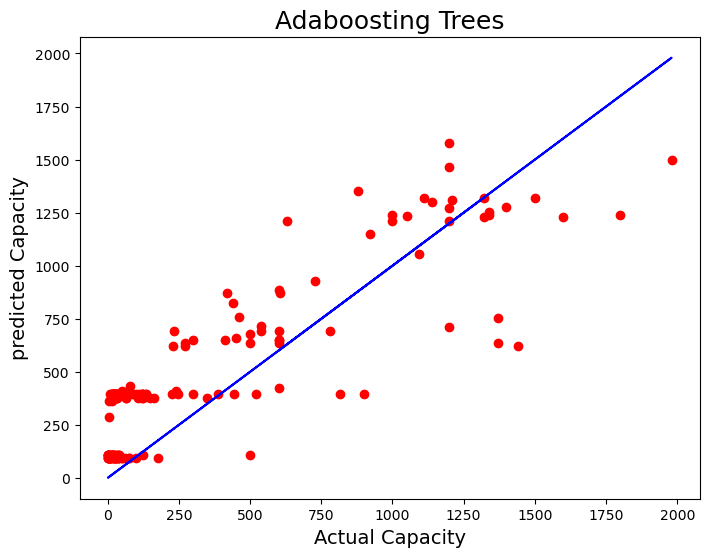

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Capacity',fontsize=14)
plt.ylabel('predicted Capacity',fontsize=14)
plt.title('Adaboosting Trees',fontsize=18)
plt.savefig('ada1.png')
plt.show()

# Mean Absolute Error (MAE)

In [151]:
print("MAE:",mean_absolute_error(y_test,pred_test_y))

MAE: 217.25230508142764


# Mean Squared Error (MSE)

In [152]:
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MSE: 71242.56038315588
RMSE: 266.91302025782835


# Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lr=LinearRegression()

In [155]:
lr.fit(x_train,y_train)

LinearRegression()

In [156]:
pred_test_y=lr.predict(x_test)
print("Testing Accuracy :-",r2_score(y_test,pred_test_y))

Testing Accuracy :- 0.5031125205122009


# Cross Validation Score

In [157]:
lssscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.40801528360369194


# Mean Absolute Error (MAE)

In [158]:
print("MAE:",mean_absolute_error(y_test,pred_test_y))

MAE: 233.453784835738


# Mean Squared Error (MSE)

In [159]:
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MSE: 105228.86669991724
RMSE: 324.3899916765578


# Gradient Boosting Tree


In [160]:
from sklearn.ensemble import GradientBoostingRegressor

In [161]:
gbt=GradientBoostingRegressor()

In [162]:
gbt.fit(x_train,y_train)

GradientBoostingRegressor()

In [163]:
pred_test_y=gbt.predict(x_test)
print("Testing Accuracy :-",r2_score(y_test,pred_test_y))

Testing Accuracy :- 0.8142785685180334


# Cross Validation Score

In [164]:
lssscore_selected=cross_val_score(gbt,x,y,cv=2).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7299063508673695


# Mean Absolute Error (MAE)

In [165]:
print("MAE:",mean_absolute_error(y_test,pred_test_y))

MAE: 106.38347786446907


# Mean Squared Error (MSE)

In [166]:
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MSE: 39331.350785653194
RMSE: 198.32133214975437


# Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(x_train,y_train)

pred_test_y=rf.predict(x_test)
print("Testing Accuracy :-",r2_score(y_test,pred_test_y))

Testing Accuracy :- 0.8312902822096515


# Cross Validation Score

In [168]:
lssscore_selected=cross_val_score(rf,x,y,cv=2).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7392320576842104


In [169]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))


MAE: 99.51867319332946
MSE: 35728.67729056386
RMSE: 189.02030920132327


# Conclusion

We can observe that at random state 11 and cv=2

Gradient Boosting Trees

------Testing Accuracy:81.37 and Cross val score:73.13--------

Random Forest

------Testing Accuracy:84.18 and Cross val score:74.58--------

Linear Regression

------Testing Accuracy:50.31 and Cross val score:40.81--------

Ada Boosting

------ Testing Accuracy:72.08 and Cross val score:65.60--------

# We can say that Random Forest is the best model for this regression problem

# Hyperparamter Tuning

In [170]:
params={'n_estimators':[1,5,10,20],
       'max_depth':[10,20,30,40,50],
       'min_samples_split':[2,3,4,5,6,7],
       'min_samples_leaf':[2,3,4,5,6,7,] }

In [171]:
grd=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [172]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 5, 10, 20]})

In [173]:
print('best_parameters',grd.best_params_)

best_parameters {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20}


In [174]:
rf=RandomForestRegressor(max_depth=40,min_samples_leaf=4,min_samples_split=7,n_estimators=10)

In [175]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=40, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=10)

In [176]:
pred_test_y=rf.predict(x_test)
print("Testing Accuracy :-",r2_score(y_test,pred_test_y))

Testing Accuracy :- 0.8365361633500518


# Cross Validation Score

In [177]:
lssscore_selected=cross_val_score(rf,x,y,cv=2).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7359454565378967


# Saving the best model

In [178]:
import pickle
pickle.dump(rf,open('regmodel_database','wb'))